In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker    

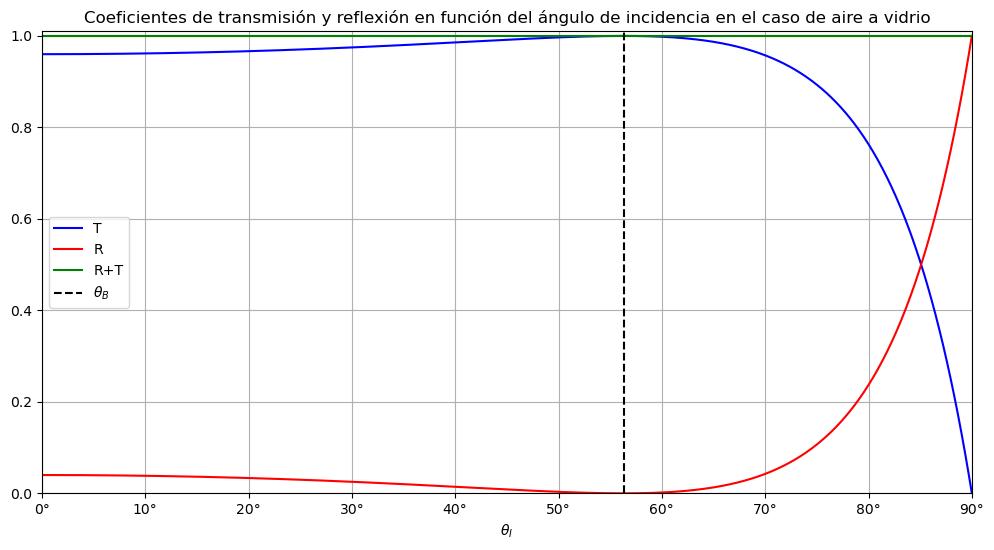

In [4]:
#alpha = lambda theta_T, theta_I: np.cos(theta_T) / np.cos(theta_I)  
alpha = lambda n1, n2, theta_I: (1-((n1/n2)*np.sin(theta_I))**2)**(1/2) / np.cos(theta_I)  
beta = lambda mu1, mu2, n1, n2: (mu1*n2) / (mu2*n1)

def R(theta_I):
    return ((alpha(n1,n2,theta_I)-beta(mu1,mu2,n1,n2))/(alpha(n1,n2,theta_I)+beta(mu1,mu2,n1,n2)))**2

def T(theta_I):
    return alpha(n1,n2,theta_I)*beta(mu1,mu2,n1,n2)*(2/(alpha(n1,n2,theta_I)+beta(mu1,mu2,n1,n2)))**2

# Constantes
n1 = 1
n2 = 1.5
mu1, mu2 = 1, 1 # mu1 = mu2

grados = np.linspace(0, 90, 1000)
radianes = np.deg2rad(grados)
transmisiones = T(radianes)
reflexiones = R(radianes)
brewster = grados[np.argmax(transmisiones)] # tambien sirve np.argmin(reflexiones)

plt.figure(figsize=(12, 6))
# se coloca el signo ° en cada angulo del eje x
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d°')) 
plt.xlabel(r'$\theta_I$') # plt.xlabel(r'$\theta_I$ [°]')
plt.plot(grados, transmisiones, c='b', label = 'T')
plt.plot(grados, reflexiones, c = 'r', label = 'R')
plt.plot(grados, transmisiones+reflexiones, c = 'g', label = 'R+T')
plt.axvline(brewster, c='k', linestyle='--', label = r'$\theta_B$')
plt.ylim(0,1.01)
plt.xlim(0,90)
plt.grid()
plt.legend()
plt.title('Coeficientes de transmisión y reflexión en función del ángulo de incidencia'
         ' en el caso de aire a vidrio')
plt.savefig('tarea3.png', dpi = 400)
plt.show()